In [1]:
import numpy as np

In [2]:
data = np.random.normal(5, 10, size=(10,))

In [3]:
from bayespy.nodes import GaussianARD, Gamma

In [13]:
mu = GaussianARD(0, 1e-6)
tau = Gamma(1e-6, 1e-6)
y = GaussianARD(mu, tau, plates=(10,))

In [16]:
y.observe(data)

In [17]:
from bayespy.inference import VB
Q = VB(mu, tau, y)

In [18]:
Q.update(repeat=20)

Iteration 1: loglike=-5.551114e+01 (0.002 seconds)
Iteration 2: loglike=-5.397168e+01 (0.002 seconds)
Iteration 3: loglike=-5.396936e+01 (0.001 seconds)
Iteration 4: loglike=-5.396934e+01 (0.001 seconds)
Converged at iteration 4.


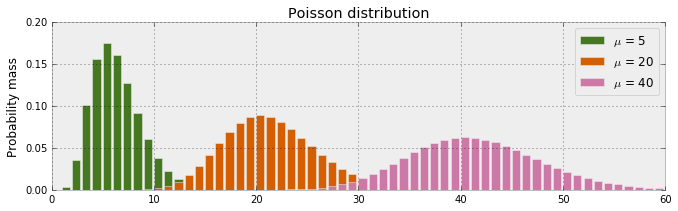

In [37]:
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline
plt.style.use('bmh')
colors = ['#348ABD', '#A60628', '#7A68A6', '#467821', '#D55E00', 
          '#CC79A7', '#56B4E9', '#009E73', '#F0E442', '#0072B2']

fig = plt.figure(figsize=(11,3))
ax = fig.add_subplot(111)
x_lim = 60
mu = [5, 20, 40]
for i in np.arange(x_lim):
    plt.bar(i, stats.poisson.pmf(mu[0], i), color=colors[3])
    plt.bar(i, stats.poisson.pmf(mu[1], i), color=colors[4])
    plt.bar(i, stats.poisson.pmf(mu[2], i), color=colors[5])
    
_ = ax.set_xlim(0, x_lim)
_ = ax.set_ylim(0, 0.2)
_ = ax.set_ylabel('Probability mass')
_ = ax.set_title('Poisson distribution')
_ = plt.legend(['$\mu$ = %s' % mu[0], '$\mu$ = %s' % mu[1], '$\mu$ = %s' % mu[2]])

In [6]:
import bayespy.plot as bpplt

In [ ]:
bpplt.pyplot.subplot(2, 1, 1)
bpplt.pdf(mu, np.linspace(-10, 20, num=100), color='k', name=r'\mu')
bpplt.pyplot.subplot(2, 1, 2)
bpplt.pdf(tau, np.linspace(1e-6, 0.08, num=100), color='k', name=r'\tau')
bpplt.pyplot.tight_layout()
bpplt.pyplot.show()

/Users/rio/anaconda/lib/python3.5/site-packages/matplotlib/tight_layout.py:222: UserWarning: tight_layout : falling back to Agg renderer
  warnings.warn("tight_layout : falling back to Agg renderer")


In [39]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn.apionly as sns

from datetime import datetime

%matplotlib inline
plt.style.use('bmh')
colors = ['#348ABD', '#A60628', '#7A68A6', '#467821', '#D55E00', 
          '#CC79A7', '#56B4E9', '#009E73', '#F0E442', '#0072B2']